## load data

In [17]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import california_housing

In [2]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
data = load_boston()
#data = load_digits()
datas = data['data']
targets = data['target']

## test pca

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = np.empty((100,2))
X[:,0]=np.random.uniform(0,100,size=100)
X[:,1]=0.75*X[:,0]+3+np.random.normal(0,10,size=100)

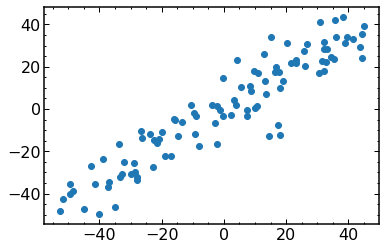

In [17]:
plt.scatter(X[:,0],X[:,1])

In [13]:
def demean(X:np.ndarray):
    return X - X.mean(axis=0)
    

## PCA

In [19]:
def f(w:np.ndarray,X:np.ndarray):
    return np.sum((X.dot(w))**2)
    

In [20]:
def df(w:np.ndarray,X:np.ndarray):
    return X.T.dot(x.dot(w))*2/len(X)

In [ ]:
def gradient_ascent(w:np.ndarray,X:np.ndarray):
    